In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Magnetar
import glob

In [2]:
# Load a surface model
ee=np.logspace(-2,2,401)
allsurface=Magnetar.surface_model().loaddata(glob.glob('Sample_Atmospheres/B14.11T6.48/*.int'))


In [3]:
# Calculate the spectra
iilist,qqlist, mcolat = [],[],[]
for ii, pp in enumerate(allsurface.patches):
    iiint,qqint = pp.fluxIQ(ee)
    iilist.append(iiint)
    qqlist.append(qqint)

In [4]:
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))


In [5]:
eo = ee/1.3
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(eo,eabs,sabs)/(eo)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.3e22*ssabs)

In [6]:
# from Magnetar import partial_res_comptonization
new_patch150=Magnetar.partial_res_comptonization(allsurface.patches[3],-0.151,150)
#comp_patch3=allsurface.patches[3]**0.151
ii150,qq150=new_patch150.fluxIQ(ee)
new_patch150u=Magnetar.partial_res_comptonization(allsurface.patches[3],0.151,150)
#comp_patch3=allsurface.patches[3]**0.151
ii150u,qq150u=new_patch150u.fluxIQ(ee)
new_patch50=Magnetar.partial_res_comptonization(allsurface.patches[3],-0.151,50)
#comp_patch3=allsurface.patches[3]**0.151
ii50,qq50=new_patch50.fluxIQ(ee)
new_patch50u=Magnetar.partial_res_comptonization(allsurface.patches[3],0.151,50)
#comp_patch3=allsurface.patches[3]**0.151
ii50u,qq50u=new_patch50u.fluxIQ(ee)

In [29]:
allsurface.mcolat[1]

31.788

(0.001, 0.1)

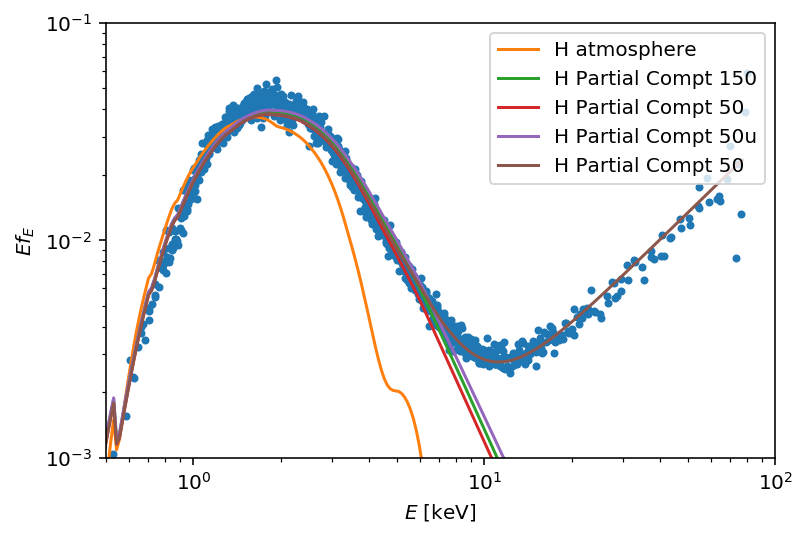

In [7]:
plt.loglog(datae,dataf,'.')
#factor=1.2e6 # 0.37 keV
factor=5.5e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*(iilist[3]*ee),label='H atmosphere')
plt.loglog(eo,factor*totabs*(ii150*ee),label='H Partial Compt 150')
plt.loglog(eo,factor*totabs*(ii50*ee),label='H Partial Compt 50')
plt.loglog(eo,factor*totabs*(ii50u*ee),label='H Partial Compt 50u')
plt.loglog(eo,factor*totabs*(ii50*ee)+totabs*ee**1.3/1.7e4,label='H Partial Compt 50')
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$E f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)

(0, 0.03)

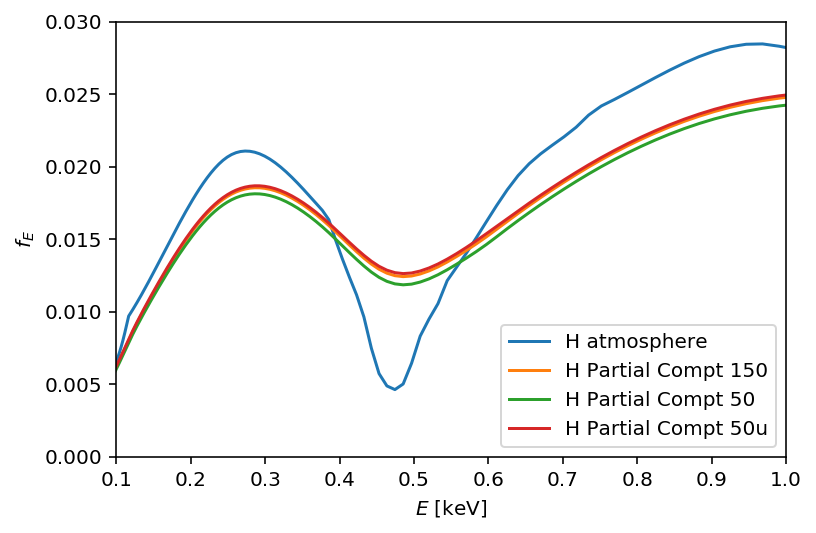

In [8]:
#plt.loglog(datae,dataf,'.')
#factor=1.2e6 # 0.37 keV
factor=5.5e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.plot(eo,factor*(iilist[3]),label='H atmosphere')
plt.plot(eo,factor*(ii150),label='H Partial Compt 150')
plt.plot(eo,factor*(ii50),label='H Partial Compt 50')
plt.plot(eo,factor*(ii50u),label='H Partial Compt 50u')
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.1,1)
plt.ylim(0,3e-2)

/projects/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


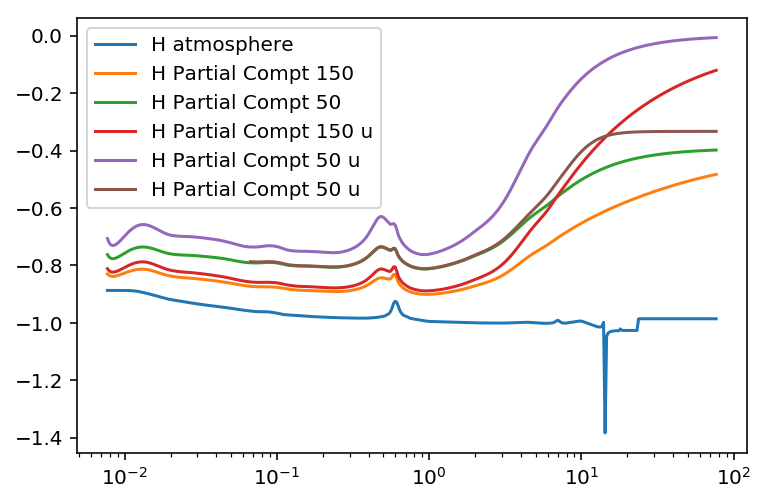

In [9]:
plt.semilogx(eo,qqlist[0]/iilist[0],label='H atmosphere')
plt.semilogx(eo,qq150/ii150,label='H Partial Compt 150')
plt.semilogx(eo,qq50/ii50,label='H Partial Compt 50')
plt.semilogx(eo,qq150u/ii150u,label='H Partial Compt 150 u')
plt.semilogx(eo,qq50u/ii50u,label='H Partial Compt 50 u')
plt.semilogx(eo,(factor*totabs*(qq50*ee)-1.0/3.0*totabs*ee**1.3/1.7e4)/(factor*totabs*(ii50*ee)+totabs*ee**1.3/1.7e4),label='H Partial Compt 50 u')
plt.legend()


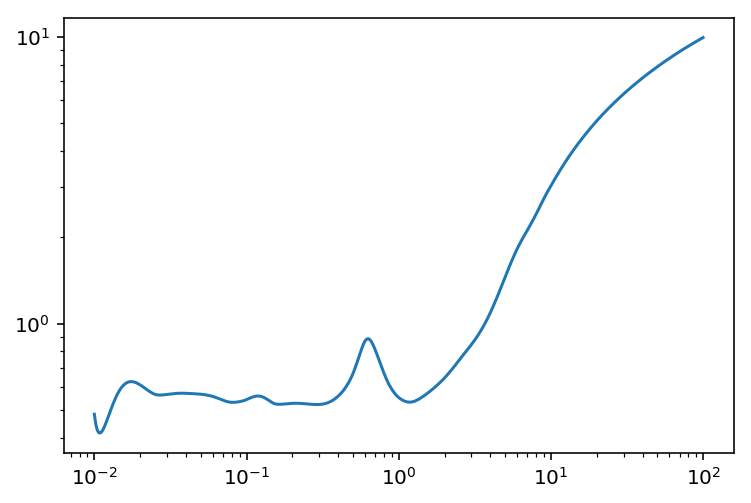

In [12]:
plt.loglog(new_patch50.ee,new_patch50.meanscat)

In [13]:
# from Magnetar import partial_res_comptonization
# new model that does the up-scattering for both low and high energy power-law
# the parameters are y, kTe, maximum relative energy boost for low-E power-law, high-energy slope in phase-space density
# the final parameter is the slope of E f_E minus 4! \
tw_patch150=Magnetar.partial_twisted_comptonization(allsurface.patches[3],0.151,150,7.0,-2.7)
#
# if high-energy part came from Kompaneet's equation with constant kTe and sigma then
# -2.7 = -1.5 pm sqrt (2.25 + 4/y)
# -1.2 = pm sqrt (2.25 + 4/y) -> 1.44 = 2.25 + 4/y -> y= -4.93 ( ? nonsense )
# so high-energy part comes from another process ... e.g. scattering off of relativistic electrons with a power-law distribution
# where the number of scatterers increases with energy as E^0.4 ... there are more electrons on loops closer to the star and they 
# scatter photons to higher energies ... Efinal = Gamma E
iit,qqt=tw_patch150.fluxIQ(ee)

(0.001, 0.1)

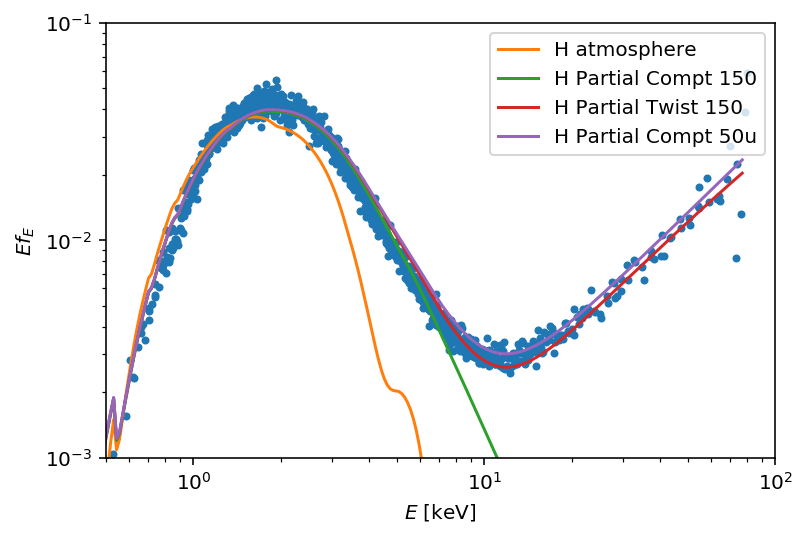

In [14]:
plt.loglog(datae,dataf,'.')
#factor=1.2e6 # 0.37 keV
factor=5.5e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*(iilist[3]*ee),label='H atmosphere')
plt.loglog(eo,factor*totabs*(ii150*ee),label='H Partial Compt 150')
plt.loglog(eo,factor*totabs*iit*ee,label='H Partial Twist 150')
plt.loglog(eo,factor*totabs*(ii50u*ee)+totabs*ee**1.3/1.7e4,label='H Partial Compt 50u')
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$E f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)

(0.0001, 0.1)

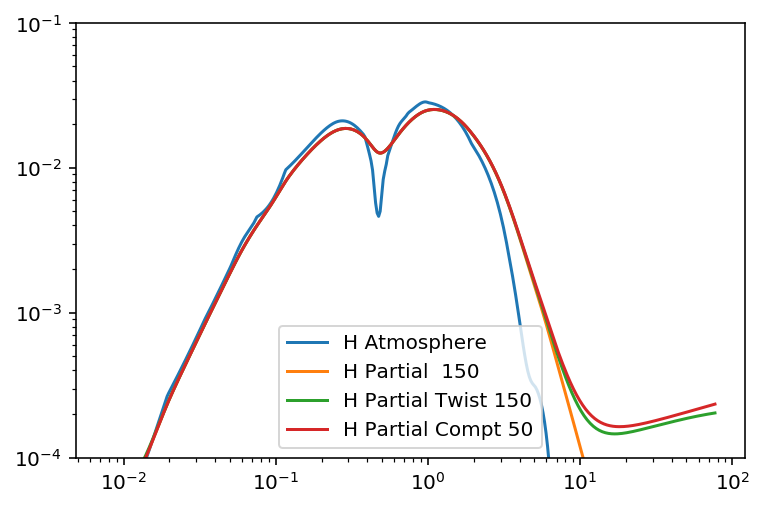

In [15]:
plt.loglog(eo,factor*(iilist[3]),label='H Atmosphere')
plt.loglog(eo,factor*(ii150u),label='H Partial  150')
plt.loglog(eo,factor*(iit),label='H Partial Twist 150')
plt.loglog(eo,factor*(ii50u)+totabs*ee**0.3/1.7e4,label='H Partial Compt 50')

plt.legend()
plt.ylim(1e-4,0.1)

/projects/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/projects/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


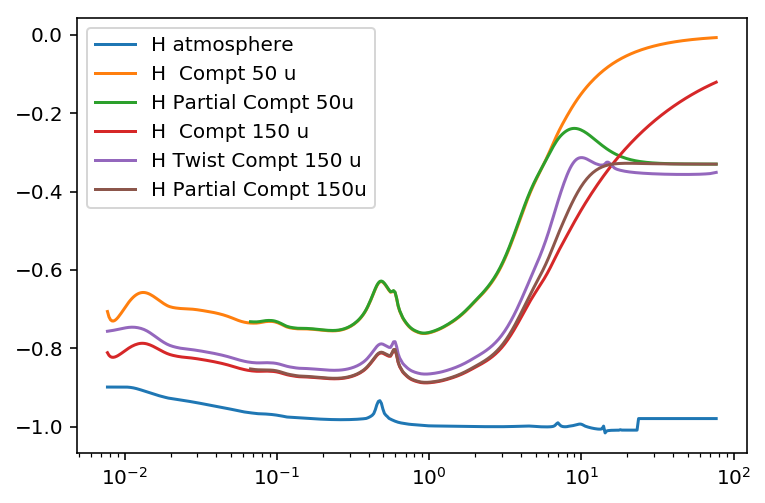

In [16]:
plt.semilogx(eo,qqlist[3]/iilist[3],label='H atmosphere')
plt.semilogx(eo,qq50u/ii50u,label='H  Compt 50 u')
plt.semilogx(eo,(factor*totabs*(qq50u*ee)-0.33*totabs*ee**1.3/1.7e4)/(factor*totabs*(ii50u*ee)+totabs*ee**1.3/1.7e4),label='H Partial Compt 50u')
plt.semilogx(eo,qq150u/ii150u,label='H  Compt 150 u')
plt.semilogx(eo,qqt/iit,label='H Twist Compt 150 u')
plt.semilogx(eo,(factor*totabs*(qq150u*ee)-0.33*totabs*ee**1.3/1.7e4)/(factor*totabs*(ii150u*ee)+totabs*ee**1.3/1.7e4),label='H Partial Compt 150u')

plt.legend()


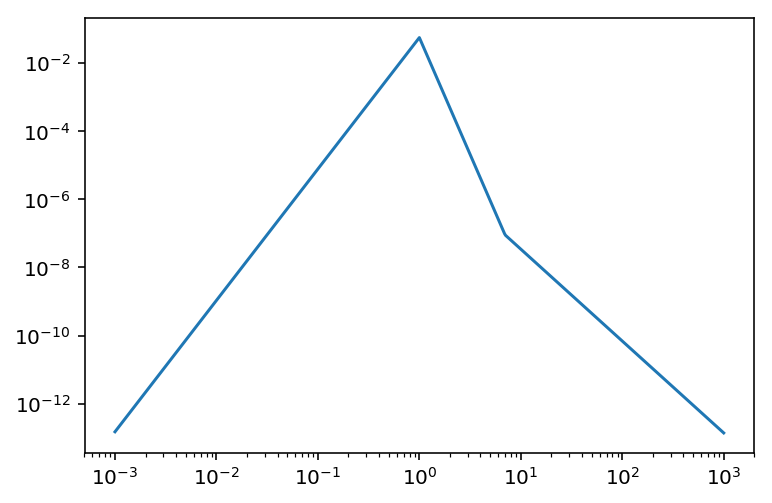

In [17]:
plt.loglog(tw_patch150.ee,tw_patch150.kernelval)

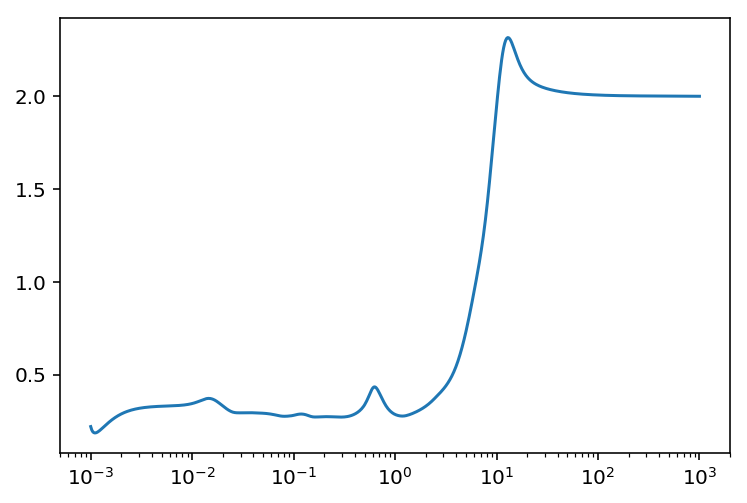

In [18]:
plt.semilogx(tw_patch150.ee,tw_patch150.meanscat)

# The Comptonized spectrum over predicts the observation but we started with too hot an atmosphere

This is just to demonstrate things

In [19]:
from Magnetar import bob
# Try partial Comptonization of spectrum #3 both modes for a harder spectrum y=0.3
comp_patch3=~((~(allsurface.patches[3]**0.3))**0.3)
#comp_patch3=allsurface.patches[3]**0.151
ii3,qq3=comp_patch3.fluxIQ(ee)

ImportError: cannot import name 'bob'

NameError: name 'ii3' is not defined

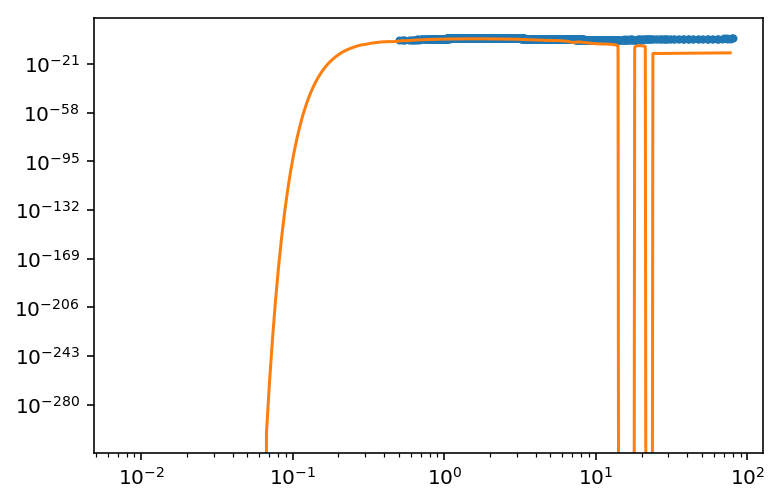

In [20]:
plt.loglog(datae,dataf,'.')
#factor=1.2e6 # 0.37 keV
factor=1.9e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*(iilist[3]*ee),label='H atmosphere')
plt.loglog(eo,factor*totabs*(ii3*ee),label='H Partial Compt')
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$E f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)

In [0]:
# let's use the initial and final spectra to work on the polarization
from scipy.interpolate import interp1d
ratiofunk=interp1d(ee,(iilist[3]-ii3)/(ii3+iilist[3]))

In [0]:
# add together the original nearly polarized spectrum to one with the opposite polarization to get 
# the result of 0.33 polarization in X at high energy where scattering dominated and the original polarizaiton at low energies
# the two functions always add to one so that the flux is the same.
final_patch3=comp_patch3*(lambda ee: 0.97+0.33*ratiofunk(ee))+(~comp_patch3)*(lambda ee: 0.03-0.33*ratiofunk(ee))
iif3,qqf3=final_patch3.fluxIQ(ee)

In [0]:
plt.loglog(datae,dataf,'.')
#factor=1.2e6 # 0.37 keV
factor=1.9e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*(iilist[3]*ee),label='H atmosphere')
plt.loglog(eo,factor*totabs*(ii3*ee),label='H Partial Compt')
plt.loglog(eo,factor*totabs*(iif3*ee),label='H Partial Compt Pol')
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$E f_E$')
plt.legend()
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.5,1e2)
plt.ylim(1e-3,1e-1)

In [0]:
plt.semilogx(eo,qqlist[3]/iilist[3],label='H atmosphere')
plt.semilogx(eo,qq3/ii3,label='H Partial Compt')
plt.semilogx(eo,qqf3/iif3,label='H Partial Compt Pol')
plt.legend()


In [0]:
plt.semilogx(eo,qqlist[3]/iilist[3],label='H atmosphere')
plt.semilogx(eo,qq3/ii3,label='H Partial Compt')
plt.semilogx(eo,qqf3/iif3,label='H Partial Compt Pol')
plt.legend()


# Beaming

We can deal with beaming by using the original atmosphere for the low energy part and multiply it by the flux ratio of the final spectrum to that of original atmosphere and use the final spectrum with beaming added for the high-energy part.

We could be even more sophisicated by having the Comptonization package determine the number of scattering or at the least the relative eneregy change and use this to determine the polarization and beaming.  Because we are doing RICS the beaming and polarization are different than for the ICS that is already in the package.  We could also use different Compton y-parameters for the different polarizations because the O cross section is smaller than the X one.

We have ($\theta$ is the incoming angle and $\theta'$ is the outgoing angle with respect to the magnetic field)
$$
\left . \frac{d \sigma}{d \Omega} \right|_{O\rightarrow O}  = \frac{3\pi r_0 c}{8} \delta (\omega-\omega_B) \cos^2\theta \cos^2\theta'
$$
$$
\left . \frac{d \sigma}{d \Omega} \right|_{O\rightarrow X}  = \frac{3\pi r_0 c}{8} \delta (\omega-\omega_B) \cos^2\theta 
$$
$$
\left . \frac{d \sigma}{d \Omega} \right|_{X\rightarrow X}  = \frac{3\pi r_0 c}{8} \delta (\omega-\omega_B)
$$
$$
\left . \frac{d \sigma}{d \Omega} \right|_{X\rightarrow O}  = \frac{3\pi r_0 c}{8} \delta (\omega-\omega_B)  \cos^2\theta'
$$


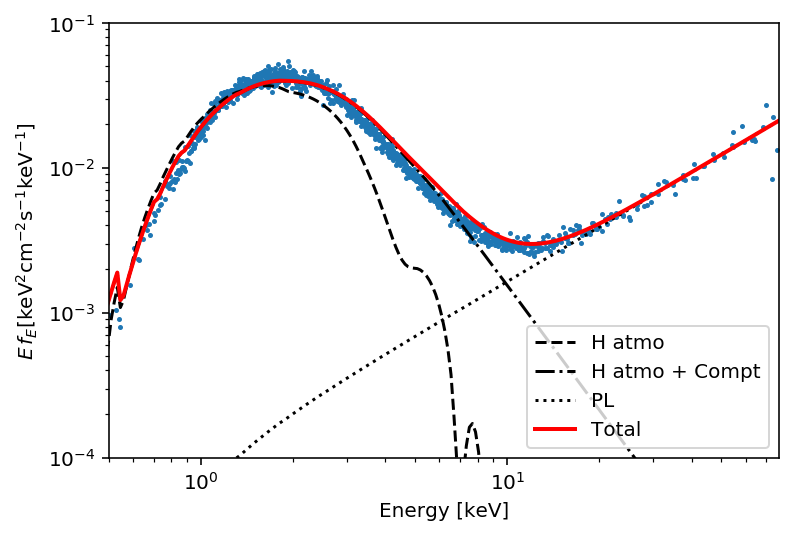

In [34]:
plt.loglog(datae,dataf,'.',markersize=3)
#factor=1.2e6 # 0.37 keV
factor=5.5e-6 # 0.346 keV
# factor=0.6e6 # 0.42 keV
plt.loglog(eo,factor*totabs*(iilist[3]*ee),'k--',label='H atmo')
plt.loglog(eo,factor*totabs*(ii150u*ee),'k-.',label='H atmo + Compt')
plt.loglog(eo,totabs*ee**1.25/1.5e4,'k:',label='PL')
plt.loglog(eo,factor*totabs*(ii150u*ee)+totabs*ee**1.25/1.5e4,'r',label='Total',linewidth=2)
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel(r'$E\,f_E[\rm{keV}^2 \rm{cm}^{-2}\rm{s}^{-1}\rm{keV}^{-1}]$')
#plt.loglog(ee,nout*ee**3)
plt.xlim(0.5,1e2/1.3)
plt.ylim(1e-4,1e-1)
plt.savefig('RCSspec.pdf',bbox_inches='tight')

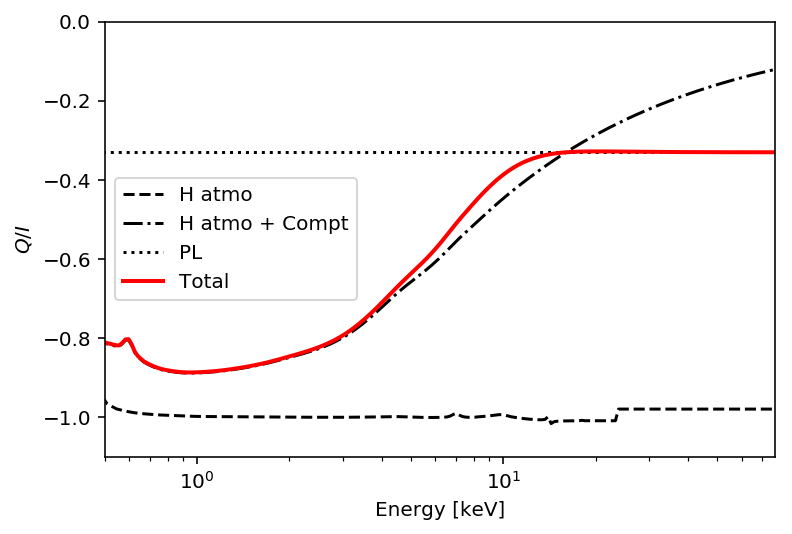

In [33]:
plt.semilogx(eo,qqlist[3]/iilist[3],'k--',label='H atmo')
plt.semilogx(eo,qq150u/ii150u,'k-.',label='H atmo + Compt')
plt.semilogx([ee[0],ee[-1]],[-0.33,-0.33],'k:',label='PL')
plt.semilogx(eo,(factor*(qq150u*ee)-0.33*ee**1.25/1.5e4)/(factor*(ii150u*ee)+ee**1.25/1.5e4),'r',label='Total',linewidth=2)
plt.legend()
plt.xlim(0.5,1e2/1.3)
plt.ylim(-1.1,0)
plt.xlabel("Energy [keV]")
plt.ylabel(r'$Q/I$')
plt.savefig('RCSQI.pdf',bbox_inches='tight')

In [35]:
np.savetxt("Nobili.txt",np.c_[eo,(factor*(qq150u*ee)-0.33*ee**1.25/1.5e4)/(factor*(ii150u*ee)+ee**1.25/1.5e4)])